In [49]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import geopandas as geopd
from shapely.geometry import Point

In [53]:
taksim_tweets = pd.read_csv("Data/taksim_violence_labeled_tweets.csv")

In [29]:
taksim_tweets.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'index_right', 'Unnamed: 0.1.1', 'id',
       'created_at', 'text', 'coordinates', 'place', 'user', 'long', 'lat',
       'points', 'proccd_text', 'prediction', 'non_vio_prob', 'vio_prob',
       'created_at_dt'],
      dtype='object')

In [24]:
taksim_tweets["created_at_dt"] = pd.to_datetime(taksim_tweets["created_at"])

In [25]:
taksim_tweets_dt = taksim_tweets.set_index(taksim_tweets["created_at_dt"])

In [26]:
len(taksim_tweets_dt.resample("D"))

27

In [27]:
len(taksim_tweets_dt.resample("H"))

619

/home/fatma/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).count()
  This is separate from the ipykernel package so we can avoid doing imports until


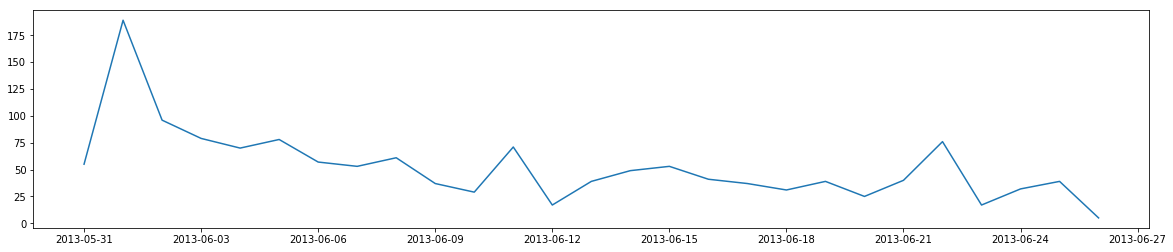

In [30]:
plt.figure(figsize=(20,4))

plt.plot(taksim_tweets_dt['prediction'].resample("D", how='count'))
plt.show()

/home/fatma/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).count()
  This is separate from the ipykernel package so we can avoid doing imports until


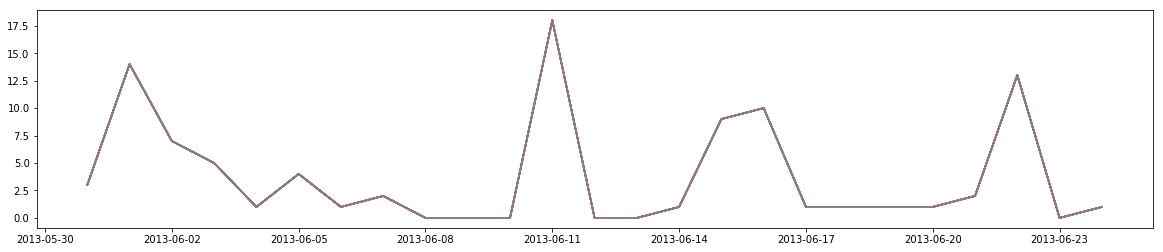

In [33]:
plt.figure(figsize=(20,4))

plt.plot(taksim_tweets_dt[taksim_tweets_dt['prediction']==1].resample("D", how='count'))
plt.show()

/home/fatma/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).count()
  This is separate from the ipykernel package so we can avoid doing imports until


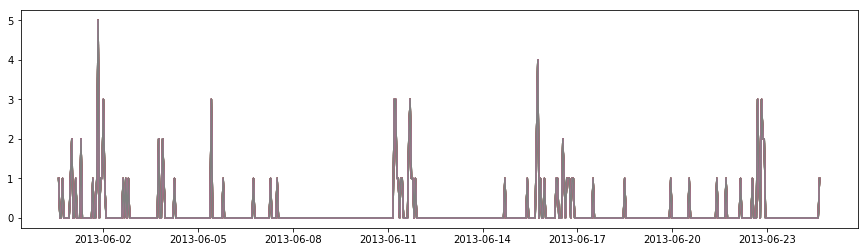

In [34]:
plt.figure(figsize=(15,4))

plt.plot(taksim_tweets_dt[taksim_tweets_dt['prediction']==1].resample("H", how='count'))
plt.show()

In [36]:
turkey_shp = geopd.read_file("Data/istanbul_turkey.imposm-shapefiles/istanbul_turkey_osm_admin.shp")

In [66]:
taksim_tweets

,Unnamed: 0,Unnamed: 0.1,index_right,Unnamed: 0.1.1,id,created_at,text,coordinates,place,user,long,lat,points,proccd_text,prediction,non_vio_prob,vio_prob
0,0,0,10,1418,340458559731032064,Fri May 31 13:23:40 +0000 2013,The government started to block the roads and ...,"{u'type': u'Point', u'coordinates': [28.976107...","{u'country_code': u'TR', u'url': u'https://api...","{u'follow_request_sent': False, u'has_extended...",28.976107,41.031545,POINT (28.97610702 41.03154531),the government started to block the roads and ...,0,0.832999,0.167001
1,1,1,13,1769,340459470738038785,Fri May 31 13:27:17 +0000 2013,You bet! @joshuafoust: I think something impor...,"{u'type': u'Point', u'coordinates': [28.973962...","{u'country_code': u'TR', u'url': u'https://api...","{u'follow_request_sent': False, u'has_extended...",28.973962,41.026888,POINT (28.97396218 41.02688827),you bet ! usrId i think something important is...,0,0.975886,0.024114
2,2,2,47,6104,340468749268287491,Fri May 31 14:04:10 +0000 2013,I'm at Muhit (istanbul) w/ 8 others http://t.c...,"{u'type': u'Point', u'coordinates': [28.981305...","{u'country_code': u'TR', u'url': u'https://api...","{u'follow_request_sent': False, u'has_extended...",28.981305,41.025823,POINT (28.98130518 41.02582311),i m at muhit istanbul httpAddress D others htt...,0,0.946050,0.053950
3,3,3,48,6232,340469051551805441,Fri May 31 14:05:22 +0000 2013,"This our country! Turkey, has been conquered b...","{u'type': u'Point', u'coordinates': [28.986933...","{u'country_code': u'TR', u'url': u'https://api...","{u'follow_request_sent': False, u'has_extended...",28.986933,41.038319,POINT (28.98693323 41.03831906),this our country ! turkey has been conquered b...,0,0.970900,0.029100
4,4,4,53,6962,340470949583388673,Fri May 31 14:12:54 +0000 2013,"""@serkanocakkk: Istiklal Street, normally has ...","{u'type': u'Point', u'coordinates': [28.987123...","{u'country_code': u'TR', u'url': u'https://api...","{u'follow_request_sent': False, u'has_extended...",28.987124,41.031141,POINT (28.9871236 41.0311415),serkanocakk istiklal street normally has a dai...,0,0.953224,0.046776
5,5,5,58,7210,340471562689986560,Fri May 31 14:15:20 +0000 2013,@benabyad today Turkish police officers resemb...,"{u'type': u'Point', u'coordinates': [28.987334...","{u'country_code': u'TR', u'url': u'https://api...","{u'follow_request_sent': False, u'has_extended...",28.987335,41.031074,POINT (28.98733476 41.03107438),usrId today turkish police officers resemble s...,1,0.269510,0.730490
6,6,6,72,8433,340474473016872960,Fri May 31 14:26:54 +0000 2013,"""@muratgozoglu: The Armenian Cultural Centre o...","{u'type': u'Point', u'coordinates': [28.987113...","{u'country_code': u'TR', u'url': u'https://api...","{u'follow_request_sent': False, u'has_extended...",28.987113,41.031146,POINT (28.9871131 41.0311456),muratgozoglu the armenian cultural centre on t...,0,0.811235,0.188765
7,7,7,74,8645,340475104066695168,Fri May 31 14:29:25 +0000 2013,@ismet_berkan @didem_soydan: A beautiful image...,"{u'type': u'Point', u'coordinates': [28.987121...","{u'country_code': u'TR', u'url': u'https://api...","{u'follow_request_sent': False, u'has_extended...",28.987121,41.031176,POINT (28.9871214 41.03117589999999),usrId usrId a beautiful image of real unity be...,0,0.928802,0.071198
8,8,8,98,11989,340483104621854721,Fri May 31 15:01:12 +0000 2013,If it's so simple why on earth did these offic...,"{u'type': u'Point', u'coordinates': [28.987104...","{u'country_code': u'TR', u'url': u'https://api...","{u'follow_request_sent': False, u'has_extended...",28.987105,41.031166,POINT (28.9871049 41.0311659),if it s so simple why on earth did these offic...,0,0.983916,0.016084
9,9,9,120,13940,340487498146910208,Fri May 31 15:18:40 +0000 2013,"Just reached Kabatas, the pepper gas effects a...","{u'type': u'Point', u'coordinates': [28.992572...","{u'country_code': u'TR', u'url': u'https://api...","{u'follow_request_sent': False, u'has_extended...",28.992573,41.034133,POINT (28.99257

In [70]:
geometry = [Point(xy) for xy in zip(taksim_tweets.long, taksim_tweets.lat)]
taksim_tweets = geopd.GeoDataFrame(taksim_tweets, geometry = geometry )

In [71]:
taksim = turkey_shp[turkey_shp["id"] == 32]

In [72]:
taksin_minx, taksim_miny, taksim_maxx, taksim_maxy = turkey_shp[turkey_shp["id"] == 32].total_bounds

In [73]:
taksim_tweets.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'index_right', 'Unnamed: 0.1.1', 'id',
       'created_at', 'text', 'coordinates', 'place', 'user', 'long', 'lat',
       'points', 'proccd_text', 'prediction', 'non_vio_prob', 'vio_prob',
       'geometry'],
      dtype='object')

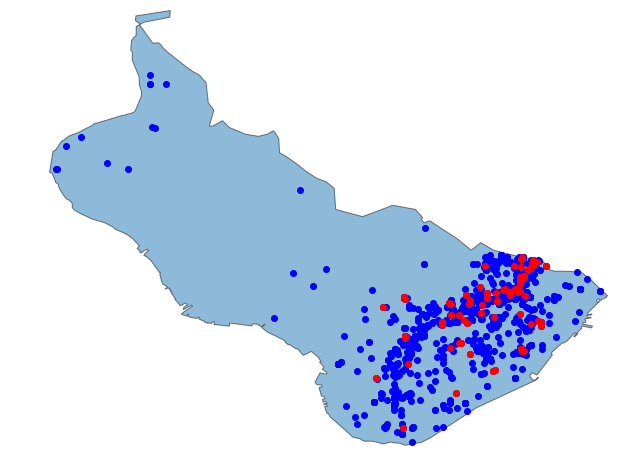

In [76]:
taksin_minx, taksim_miny, taksim_maxx, taksim_maxy = turkey_shp[turkey_shp["id"] == 32].total_bounds
ax = turkey_shp[turkey_shp["id"] == 32].plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
ax.set_xlim(taksin_minx, taksim_maxx)
ax.set_ylim(taksim_miny, taksim_maxy)
taksim_tweets.plot(ax=ax, color='blue', alpha=1)
taksim_tweets[taksim_tweets['prediction'] == 1].plot(ax=ax, color='red', alpha=1)
ax.set_axis_off()
plt.show()